In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from textCNN import textCNN
import word_processing
from sklearn.model_selection import train_test_split
import Train

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

cuda:3


In [2]:
with open('./dataset/MovieReview/rt-polaritydata/rt-polarity.pos', 'r', encoding='latin-1') as f:
    pos_sentences = f.readlines()

In [3]:
with open('./dataset/MovieReview/rt-polaritydata/rt-polarity.neg', 'r', encoding='latin-1') as f:
    neg_sentences = f.readlines()

## normalized sentences

In [4]:
pos_sentences = [word_processing.normalizeString(sentence) for sentence in pos_sentences]
neg_sentences = [word_processing.normalizeString(sentence) for sentence in neg_sentences]

## build vocab

In [5]:
Vocab = word_processing.Vocab('vocab')

for i in pos_sentences:
    Vocab.addSentence(i)
    
for i in neg_sentences:
    Vocab.addSentence(i)

## transform sentences to index sequence

In [6]:
MAX_LEN = 20

pos_seq = np.asarray([word_processing.indexesFromSentence(Vocab, sentence, MAX_LEN) for sentence in pos_sentences])
neg_seq = np.asarray([word_processing.indexesFromSentence(Vocab, sentence, MAX_LEN) for sentence in neg_sentences])

In [7]:
print('pos',pos_seq.shape)
print('neg',neg_seq.shape)

pos (5331, 20)
neg (5331, 20)


## prepare data for training 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(np.concatenate([pos_seq, neg_seq]), 
                                                    np.concatenate([np.ones(len(pos_seq)), np.zeros(len(neg_seq))]), 
                                                    test_size=0.1, random_state=2)

In [9]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (9595, 20)
y_train (9595,)
x_test (1067, 20)
y_test (1067,)


In [10]:
x_train_tensors = torch.LongTensor(x_train).to(device)
y_train_tensors = torch.LongTensor(y_train).to(device)

x_test_tensors = torch.LongTensor(x_test).to(device)
y_test_tensors = torch.LongTensor(y_test).to(device)

## training

In [11]:
model = textCNN(vocab_size=Vocab.num_vocab, seq_length=MAX_LEN, embedding_size=300, num_labels=2).to(device)

iter 1 / 50
0m 2s (- 2m 26s) train loss: 0.723.  val loss: 0.656.  train acc: 0.573.  val acc: 0.604
val acc increase from 0.000 to 0.604
save models

iter 2 / 50
0m 6s (- 2m 40s) train loss: 0.584.  val loss: 0.612.  train acc: 0.686.  val acc: 0.668
val acc increase from 0.604 to 0.668
save models

iter 3 / 50
0m 10s (- 2m 41s) train loss: 0.481.  val loss: 0.599.  train acc: 0.767.  val acc: 0.690
val acc increase from 0.668 to 0.690
save models

iter 4 / 50
0m 13s (- 2m 40s) train loss: 0.380.  val loss: 0.613.  train acc: 0.837.  val acc: 0.714
val acc increase from 0.690 to 0.714
save models

iter 5 / 50
0m 17s (- 2m 37s) train loss: 0.283.  val loss: 0.629.  train acc: 0.883.  val acc: 0.736
val acc increase from 0.714 to 0.736
save models

iter 6 / 50
0m 21s (- 2m 35s) train loss: 0.204.  val loss: 0.680.  train acc: 0.920.  val acc: 0.737
val acc increase from 0.736 to 0.737
save models

iter 7 / 50
0m 24s (- 2m 32s) train loss: 0.153.  val loss: 0.745.  train acc: 0.943.  val

<Figure size 432x288 with 0 Axes>

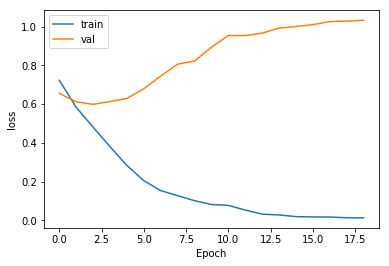

<Figure size 432x288 with 0 Axes>

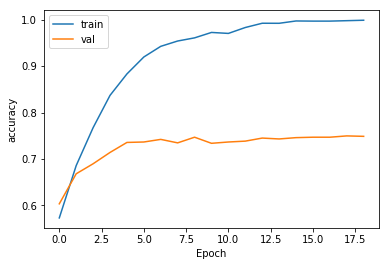

In [12]:
Train.train(input_train_tensors=x_train_tensors, output_train_tensors=y_train_tensors, 
            input_val_tensors=x_test_tensors, output_val_tensors=y_test_tensors,
            model=model, epoches=50, batch_size=50, print_every=1, plot_every=1, learning_rate=0.001)